In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [56]:
data = pd.read_csv("/home/asmaa/music-genre-prediction/artifacts/music_genre.csv")
data.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


## Shape of the dataset

In [40]:
data.shape

(50005, 18)

Let's first drop the 'obtained date' column 

In [57]:
data.drop(columns=['obtained_date','instance_id'], axis=1, inplace=True  )
data.head()

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,0.531,Electronic
2,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic


Tempo is a numerical data but from the result above it seems that it is of type 'object'

## Checking missing values

In [58]:
data.isna().sum()

artist_name         5
track_name          5
popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
valence             5
music_genre         5
dtype: int64

It seems like there are 5 missing row values. As in these rows represent 0.01% of our data. Let's perform an amputation:

In [59]:
data = data.dropna()
data.isna().sum()

artist_name         0
track_name          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
valence             0
music_genre         0
dtype: int64

In [60]:
data.shape

(50000, 16)

## Checking data types

In [61]:
data.dtypes

artist_name          object
track_name           object
popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo                object
valence             float64
music_genre          object
dtype: object

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 0 to 50004
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       50000 non-null  object 
 1   track_name        50000 non-null  object 
 2   popularity        50000 non-null  float64
 3   acousticness      50000 non-null  float64
 4   danceability      50000 non-null  float64
 5   duration_ms       50000 non-null  float64
 6   energy            50000 non-null  float64
 7   instrumentalness  50000 non-null  float64
 8   key               50000 non-null  object 
 9   liveness          50000 non-null  float64
 10  loudness          50000 non-null  float64
 11  mode              50000 non-null  object 
 12  speechiness       50000 non-null  float64
 13  tempo             50000 non-null  object 
 14  valence           50000 non-null  float64
 15  music_genre       50000 non-null  object 
dtypes: float64(10), object(6)
memory usage: 6.5+ 

It seems that the 'tempo' column is a combination of numeric object values and '?' signs indicating that the tempo is not calculated for the corresponding row. Let's first see how many rows have the value '?' in their 'tempo' column

In [65]:
len(data[data['tempo'] == '?'])

4980

There are 4980 rows whose tempo value is a question mark. Since this is almost 5000 of data rows, removing them would cause a somewhat loss of information. We could replace them with the mean of the 'tempo' values.

We need to get the mean of the numerical tempo values. We create a new dataframe for the tempo column except this dataframe only contains the rows corresponding to a numerical object, leaving behind the rows with a '?' mark as a tempo value 

In [85]:
tempo_numerical = data[data['tempo'] != '?']
tempo_numerical

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,0.531,Electronic
2,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.02799999999999,0.330,Hip-Hop
50001,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.04299999999999,0.113,Hip-Hop
50002,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,0.395,Hip-Hop
50003,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,0.354,Hip-Hop


Now, we convert this tempo column in the new dataframe into float type rather than object to get the mean

In [86]:
tempo_numerical['tempo'] = pd.to_numeric(tempo_numerical['tempo'], errors='coerce')


/tmp/ipykernel_2899/1722924575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempo_numerical['tempo'] = pd.to_numeric(tempo_numerical['tempo'], errors='coerce')


And then we extract the mean using either the describe() method or the mean() method

In [88]:
tempo_mean = tempo_numerical['tempo'].mean()

In [89]:
data.dtypes

artist_name          object
track_name           object
popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo                object
valence             float64
music_genre          object
dtype: object

Lastly, we replace the '?' values with the mean value



In [90]:
data['tempo'] = data['tempo'].replace({'?':str(tempo_mean)}) 
data[data['tempo'] =='?'].count()

artist_name         0
track_name          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
valence             0
music_genre         0
dtype: int64

Now, let's have a look back at the types in our dataset:

In [91]:
data.dtypes

artist_name          object
track_name           object
popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo                object
valence             float64
music_genre          object
dtype: object

We need to convert the tempo column into a float type since tempo is a numerically defined measurable value 

In [92]:
data['tempo'] = pd.to_numeric(data['tempo'], errors='coerce')
data.dtypes

artist_name          object
track_name           object
popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
valence             float64
music_genre          object
dtype: object

## Checking duplicates

In [93]:
duplicates = data.duplicated()
dups_sum = duplicates.sum()
dups_sum

0

There are no duplicates in the dataset

# Extracting statistical insights

In [94]:
data.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,44.220420,0.306383,0.558241,2.212526e+05,0.599755,0.181601,0.193896,-9.133761,0.093586,119.952961,0.456264
std,15.542008,0.341340,0.178632,1.286720e+05,0.264559,0.325409,0.161637,6.162990,0.101373,29.075697,0.247119
min,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,34.347000,0.000000
25%,34.000000,0.020000,0.442000,1.748000e+05,0.433000,0.000000,0.096900,-10.860000,0.036100,96.775750,0.257000
50%,45.000000,0.144000,0.568000,2.192810e+05,0.643000,0.000158,0.126000,-7.276500,0.048900,119.952961,0.448000
75%,56.000000,0.552000,0.687000,2.686122e+05,0.815000,0.155000,0.244000,-5.173000,0.098525,139.468250,0.648000
max,99.000000,0.996000,0.986000,4.830606e+06,0.999000,0.996000,1.000000,3.744000,0.942000,220.276000,0.992000


# Exploring the dataset's features

In [95]:
cat_cols = ["key","mode","music_genre"]

for col in cat_cols:
    print(f'Categories in the {col} are:{data[col].unique()} ')

Categories in the key are:['A#' 'D' 'G#' 'C#' 'F#' 'B' 'G' 'F' 'A' 'C' 'E' 'D#'] 
Categories in the mode are:['Minor' 'Major'] 
Categories in the music_genre are:['Electronic' 'Anime' 'Jazz' 'Alternative' 'Country' 'Rap' 'Blues' 'Rock'
 'Classical' 'Hip-Hop'] 


Later on, we will use the categories in the music_genre as our classification categories for our model

In [101]:
numeric_features = [feature for feature in data.columns if data[feature].dtype !='O']
print('We have {} numerical features:\n {}'.format(len(numeric_features), numeric_features))

We have 11 numerical features:
 ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']


# Popularity

In [140]:
tracks_popularity =  data['popularity'].value_counts()
tracks_popularity

popularity
52.0    1316
54.0    1295
53.0    1286
50.0    1265
55.0    1250
        ... 
95.0       2
97.0       1
99.0       1
94.0       1
92.0       1
Name: count, Length: 99, dtype: int64

- Around 2.6% of the songs have a popularity score of 52


In [141]:
inThe90s_score = data[data['popularity'] > 90.0]
inThe90s_score

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
105,DJ Snake,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",96.0,0.15300,0.841,212500.0,0.798,0.000003,C#,0.0618,-4.206,Minor,0.2290,95.948000,0.591,Electronic
25194,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,97.0,0.55600,0.760,158040.0,0.479,0.000000,D,0.0703,-5.574,Major,0.0466,89.911000,0.913,Rap
26239,Post Malone,Wow.,99.0,0.16300,0.833,149520.0,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947000,0.385,Rap
28055,Post Malone,Better Now,93.0,0.35400,0.680,231267.0,0.563,0.000000,A#,0.1360,-5.843,Major,0.0454,145.028000,0.374,Rap
28537,Travis Scott,SICKO MODE,94.0,0.00513,0.834,312820.0,0.730,0.000000,G#,0.1240,-3.714,Major,0.2220,155.008000,0.446,Rap
29974,21 Savage,a lot,93.0,0.03950,0.837,288624.0,0.636,0.001250,C#,0.3420,-7.643,Major,0.0860,145.972000,0.274,Rap
45154,Mustard,Pure Water (with Migos),91.0,0.17200,0.680,-1.0,0.559,0.000000,C,0.3180,-5.545,Major,0.1290,202.006000,0.137,Hip-Hop
47024,J. Cole,MIDDLE CHILD,96.0,0.14900,0.837,213594.0,0.364,0.000000,G#,0.2710,-11.713,Major,0.2760,123.984000,0.463,Hip-Hop
47596,Paulo Londra,Adan y Eva,95.0,0.32300,0.767,258639.0,0.709,0.000000,C#,0.0676,-4.470,Major,0.3360,119.952961,0.720,Hip-Hop
48249,Meek Mill,Going Bad (feat. Drake),95.0,0.25900,0.889,180522.0,0.496,0.000000,E,0.2520,-6.365,Minor,0.0905,86.003000,0.544,Hip-Hop


In [142]:
num_90s_score =  len(inThe90s_score)
num_90s_score

12

- Only 12 songs out of 50,000 scored in the 90s when it comes to their popularity

In [110]:
popularity_max = data['popularity'].max()
popularity_min = data['popularity'].min()
print(popularity_min)
print(popularity_max)

0.0
99.0


In [122]:
highest_ranked_track = data[ data['popularity'] == popularity_max]
lowest_ranked_tracks = data[ data['popularity'] == popularity_min]
highest_ranked_track


,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
26239,Post Malone,Wow.,99.0,0.163,0.833,149520.0,0.539,0.000002,B,0.101,-7.399,Minor,0.178,99.947,0.385,Rap


In [128]:
print(f"The most popular music track is {highest_ranked_track['track_name']}. its popularity is: {popularity_max} ")

The most popular music track is 26239    Wow.
Name: track_name, dtype: object. its popularity is: 99.0 


In [129]:
print(f"there are {len(lowest_ranked_tracks)} tracks that have no popularity")

there are 694 tracks that have no popularity


In [130]:
data['artist_name'].value_counts()

artist_name
empty_field                2489
Nobuo Uematsu               429
Wolfgang Amadeus Mozart     402
Ludwig van Beethoven        317
Johann Sebastian Bach       314
                           ... 
Ward Davis                    1
A.A. Bondy                    1
Iris DeMent                   1
Mac Davis                     1
Millonario                    1
Name: count, Length: 6863, dtype: int64

There are 2489 tracks whose artist name is not known. We could opt for scraping the artist's names from the web, but this could be challenging as a song with the same title could have been sang by different artists. Our web scraped may get confused and worst provide us with the wrong artist for the song. At the time being we will replace the 'empty_field' with 'uknown' as it is more expressive

In [134]:
data['artist_name'] = data['artist_name'].replace({'empty_field':'uknown'})
data['artist_name'].value_counts()

artist_name
uknown                     2489
Nobuo Uematsu               429
Wolfgang Amadeus Mozart     402
Ludwig van Beethoven        317
Johann Sebastian Bach       314
                           ... 
Ward Davis                    1
A.A. Bondy                    1
Iris DeMent                   1
Mac Davis                     1
Millonario                    1
Name: count, Length: 6863, dtype: int64

We could also extract the top 10 most frequently encountered artists in the dataset

In [135]:
top_ten_artists = data['artist_name'].value_counts().head(10)
top_ten_artists

artist_name
uknown                     2489
Nobuo Uematsu               429
Wolfgang Amadeus Mozart     402
Ludwig van Beethoven        317
Johann Sebastian Bach       314
Frédéric Chopin             241
Drake                       172
Capcom Sound Team           169
Yuki Hayashi                167
Eminem                      147
Name: count, dtype: int64

- Around 5% of the artists in our dataset are uknown
- Around 0.86% of the songs in the dataset are by Nobuo Uematsu
- The rest of the top 10 artists share a close distribution of the songs in the dataset 

## Music Genre:
Let's see the value counts of each music genre and observe the distribution of the dataset

In [136]:
genres_values = data['music_genre'].value_counts()
genres_values

music_genre
Electronic     5000
Anime          5000
Jazz           5000
Alternative    5000
Country        5000
Rap            5000
Blues          5000
Rock           5000
Classical      5000
Hip-Hop        5000
Name: count, dtype: int64

The dataset has an equal size for each sample in the music genre column, we then say that our dataset is balanced. The dataset has an equal representation of the classes we are trying to predict and this is good for model training.

In [137]:
data.head()

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,0.531,Electronic
2,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic


# The keys:

In [138]:
data['key'].value_counts()

key
G     5727
C     5522
C#    5405
D     5265
A     4825
F     4341
B     3789
E     3760
A#    3356
G#    3319
F#    3101
D#    1590
Name: count, dtype: int64

- The most frequently used key in our dataset is the G key
- The least frequently used key i our dataset is the D# key

# The mode

In [139]:
data['mode'].value_counts()

mode
Major    32099
Minor    17901
Name: count, dtype: int64

- Around 64% of the songs have a Major mode

# Histograms and KDE:

In [144]:
data.head()

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,0.531,Electronic
2,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic


In [143]:
import matplotlib.pyplot as plt

/tmp/ipykernel_2899/3456047462.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


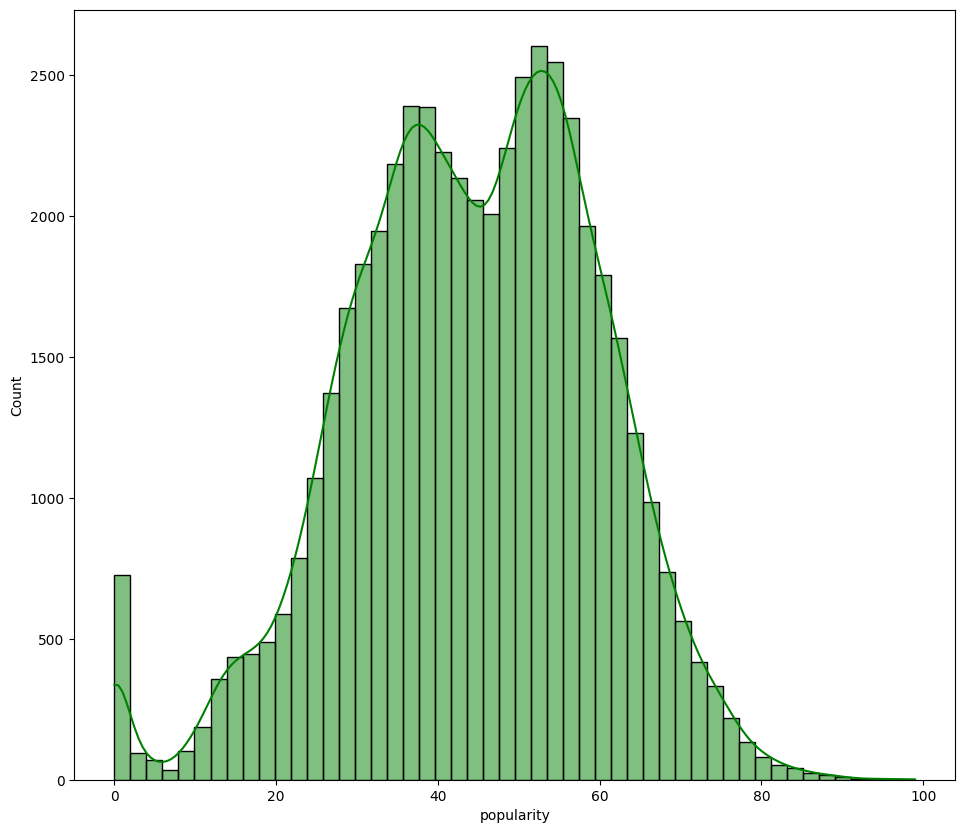

In [150]:
fig, axs = plt.subplots(1, figsize=(25, 10))
plt.subplot(121)
sns.histplot(data=data,x='popularity',bins=50,kde=True,color='g')
plt.show()

- The tracks' popularity scores seem to have a bimodal distribution
- This indicates that there are two distinct groups of songs, naturally: the most popular and the almost uneard ofs.